# Market Basket Analysis using Apriori Algorithm

## Objective
The goal of this project is to analyze retail transaction data to discover
frequent product combinations and generate association rules using the
Apriori algorithm. The insights will help improve product placement,
bundling strategies, and cross-selling opportunities.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv("Market Analysis Dataset.csv")
df.head()


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop item count column
df_clean = df.drop(columns=["Item(s)"])

# Convert each row into a transaction list
transactions = df_clean.values.tolist()

# Remove NaN values
transactions = [[item for item in t if pd.notna(item)] for t in transactions]

transactions[:5]


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [9]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

encoded_df = pd.DataFrame(te_array, columns=te.columns_)
encoded_df.head()



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
frequent_itemsets = apriori(
    encoded_df,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets.sort_values(by="support", ascending=False).head(10)


,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


In [11]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)

rules.sort_values(by="lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
34,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.0,0.015026,1.290900,0.700572,0.144304,0.225347,0.261235
33,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
17,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
19,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,1.0,0.015006,1.350565,0.559803,0.122203,0.259569,0.276037
36,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,1.0,0.011427,1.338511,0.543633,0.097987,0.252901,0.256270
35,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
4,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
16,(pork),(other vegetables),0.057651,0.193493,0.021657,0.375661,1.941476,1.0,0.010502,1.291779,0.514595,0.094373,0.225874,0.243795
7,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
32,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999


In [12]:
strong_rules = rules[
    (rules["lift"] > 1.2) &
    (rules["confidence"] > 0.4)
]

strong_rules[["antecedents", "consequents", "support", "confidence", "lift"]]


,antecedents,consequents,support,confidence,lift
0,(beef),(whole milk),0.021251,0.405039,1.585180
4,(butter),(whole milk),0.027555,0.497248,1.946053
7,(curd),(whole milk),0.026131,0.490458,1.919481
9,(domestic eggs),(whole milk),0.029995,0.472756,1.850203
11,(frozen vegetables),(whole milk),0.020437,0.424947,1.663094
13,(margarine),(whole milk),0.024199,0.413194,1.617098
17,(root vegetables),(other vegetables),0.047382,0.434701,2.246605
19,(whipped/sour cream),(other vegetables),0.028876,0.402837,2.081924
27,(root vegetables),(whole milk),0.048907,0.448694,1.756031
29,(tropical fruit),(whole milk),0.042298,0.403101,1.577595


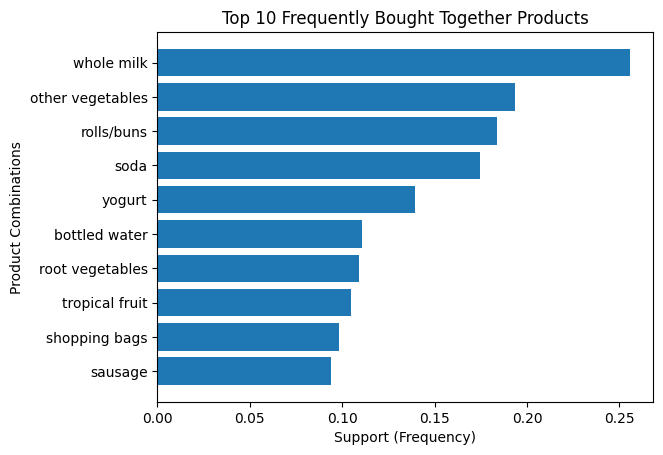

In [15]:
# Create readable labels from itemsets
frequent_itemsets["items"] = frequent_itemsets["itemsets"].apply(
    lambda x: ", ".join(list(x))
)

# Select top 10 frequent combinations
top10 = frequent_itemsets.sort_values(
    by="support",
    ascending=False
).head(10)

# Plot bar chart
plt.figure()
plt.barh(top10["items"], top10["support"])
plt.xlabel("Support (Frequency)")
plt.ylabel("Product Combinations")
plt.title("Top 10 Frequently Bought Together Products")
plt.gca().invert_yaxis()
plt.show()


In [17]:
print("Confidence : How often B occurs after A")
print("Lift : Whether A truly increases chances of B")
for _, row in strong_rules.head(5).iterrows():
    print(f"If a customer buys {set(row['antecedents'])}, "
          f"they are likely to buy {set(row['consequents'])} "
          f"(Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})")
    



Confidence : How often B occurs after A
Lift : Whether A truly increases chances of B
If a customer buys {'beef'}, they are likely to buy {'whole milk'} (Confidence: 0.41, Lift: 1.59)
If a customer buys {'butter'}, they are likely to buy {'whole milk'} (Confidence: 0.50, Lift: 1.95)
If a customer buys {'curd'}, they are likely to buy {'whole milk'} (Confidence: 0.49, Lift: 1.92)
If a customer buys {'domestic eggs'}, they are likely to buy {'whole milk'} (Confidence: 0.47, Lift: 1.85)
If a customer buys {'frozen vegetables'}, they are likely to buy {'whole milk'} (Confidence: 0.42, Lift: 1.66)


The analysis shows that whole milk is a very commonly purchased item and is strongly associated with many other products.

When customers buy beef, about 41% of them also buy whole milk.

When customers buy butter, 50% of them also buy whole milk, which is a very strong relationship.

Customers who buy curd also tend to buy whole milk nearly 49% of the time.

Buying domestic eggs increases the chance of buying whole milk to 47%.

Customers purchasing frozen vegetables also often add whole milk to their basket (42%).

The lift values are all greater than 1, which means these relationships are not random. Customers buying these items are 1.5 to 2 times more likely to buy whole milk compared to an average customer.